# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [8]:
#TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

#Instantiate the three models with max_depth = 5.

dTree = DecisionTreeRegressor(max_depth = 5)
rForest = RandomForestRegressor(max_depth = 5)
gBoost = GradientBoostingRegressor(max_depth = 5)

#Implement each machine learning model with X and y
#split the X and y into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create a list of the models
models = [dTree, rForest, gBoost]

#Create a dictionary to store the result
results = {}

#As instructed, set scoring to 'neg_mean_squared_error'
scorings = "neg_mean_squared_error"

for model in models:
    #fit the model to the training data
    model.fit(X_train, y_train)
    
    #Make predicitons on the test data
    y_prediction = model.predict(X_test)
    
    #Perform cross validation for each model on the training data
    cResult = cross_validate(model, X_train, y_train, cv = 5, scoring = scorings, return_train_score=True)
    #print(cResult.keys())
    
    #perform the training and validation Mean Squared Error Scores (negated) for each model
    ctraining_MSE = -cResult['train_score'].mean()
    cValidation_MSE = -cResult["test_score"].mean()
   
    # Store the results in the dictionary
    results[type(model).__name__] = {
        'Average Training accuracy': ctraining_MSE,
        'Average Validation accuracy': cValidation_MSE
    }
#Print the results
for model_name, mse in results.items():
    print(f"{model_name} - Average Training MSE: {mse['Average Training accuracy']:.2f}, Average Validation MSE: {mse['Average Validation accuracy']:.2f}")

# # Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

DecisionTreeRegressor - Average Training MSE: 47.82, Average Validation MSE: 73.65
RandomForestRegressor - Average Training MSE: 30.15, Average Validation MSE: 47.25
GradientBoostingRegressor - Average Training MSE: 3.69, Average Validation MSE: 23.59


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [13]:
# TO DO: ADD YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

#Instantiate the three models with max_depth = 5.

dTree = DecisionTreeRegressor(max_depth = 5)
rForest = RandomForestRegressor(max_depth = 5)
gBoost = GradientBoostingRegressor(max_depth = 5)

#Implement each machine learning model with X and y
#split the X and y into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create a list of the models
models = [dTree, rForest, gBoost]

#Create a dictionary to store the result
results = {}

#As instructed, set scoring to 'neg_mean_squared_error'
#scorings = "neg_mean_squared_error"

for model in models:
    #fit the model to the training data
    model.fit(X_train, y_train)
    
    #Make predicitons on the test data
    y_prediction = model.predict(X_test)
    
    #Perform cross validation for each model on the training data
    cResult = cross_validate(model, X_train, y_train, cv = 5, scoring = 'r2', return_train_score=True)
    #print(cResult.keys())
    
    #perform the training and validation Mean Squared Error Scores (negated) for each model
    ctraining_R2 = cResult['train_score'].mean()
    cValidation_R2 = cResult["test_score"].mean()
   
    # Store the results in the dictionary
    results[type(model).__name__] = {
        'Average Training accuracy': ctraining_R2,
        'Average Validation accuracy': cValidation_R2
    }
#Print the results
for model_name, mse in results.items():
    print(f"{model_name} - Average Training R2: {mse['Average Training accuracy']:.2f}, Average Validation R2: {mse['Average Validation accuracy']:.2f}")


DecisionTreeRegressor - Average Training R2: 0.83, Average Validation R2: 0.74
RandomForestRegressor - Average Training R2: 0.89, Average Validation R2: 0.83
GradientBoostingRegressor - Average Training R2: 0.99, Average Validation R2: 0.92


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. Using the R2 Scores, in the Linear model, the values obtained were not close to 1 unlike the R2 score for all the regressor model used here(RandomForest, Decision Tree and Gradient Boot) which are closer to 1.Infact, the gradientBoosting Regressor model was the closest to 1.
2. I would select the Gradient Boosting Regressor model. It has the lowest average mean squared error and also it has the closest R2 closest to 1
3. I can increase the max_depth which allows to capture more complex patterns though overfitting may be a problem
Another option is to preprocess the data and remove features that may not be too relevant.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1.I used the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) and also [this](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
2. I completed it in the following order:
a. imported the required library and dataset
b. Instantiated the model required for the task
c. Split the data into training and test sets
d. Created a list of the model to be used
e. Created a dictionary to hold the result
f. fit the model
g. Made predictions on the data
h  Performed cross validation
i.Used both the Mean squared error and the R2 to get the different result for comparison
3.No
4 Yes I had challenges. I needed to understand the available parameters when using the cross validation and why they may be neccessary or not


## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [33]:
# TO DO: Import wine dataset
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

# Print the size (shape) of X and y
print("Size of X: ", X.shape)
print("Size of y: ", y.shape)

# Print the data types of X and y
print("Data type of X:", type(X))
print("Data type of y:", type(y))



Size of X:  (178, 13)
Size of y:  (178, 1)
Data type of X: <class 'pandas.core.frame.DataFrame'>
Data type of y: <class 'pandas.core.frame.DataFrame'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [34]:
# TO DO: ADD YOUR CODE HERE
print("First five rows of X:")
print(X.head())

# Print the first five rows of y
print("First five rows of y:")
print(y.head())

First five rows of X:
   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [38]:
# TO DO: ADD YOUR CODE HERE
# Check for missing values in rows of X
missing_rows = X.isnull().any(axis=1)
if not missing_rows.any():
    print("No rows in X have missing values.")
else:
    print("Some rows in X have missing values.")
    
# Check for missing values in columns (features) of X and y
missing_columns = X.isnull().any()
if not missing_columns.any():
    print("No columns in X have missing values.")
else:
    print("Some columns in X have missing values.")
missing_columns = y.isnull().any()
if not missing_columns.any():
    print("No columns in y have missing values.")
else:
    print("Some columns in y have missing values.")

No rows in X have missing values.
No columns in X have missing values.
No columns in y have missing values.


How many samples do we have of each type of wine?

In [39]:
# TO DO: ADD YOUR CODE HERE
wine_sample = y.value_counts()
print(wine_sample)

class
2        71
1        59
3        48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [71]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Instantiate the two models with max_depth = 3.

Vector_SVC = SVC(kernel='rbf')
DTreeClass = DecisionTreeClassifier(max_depth = 5, random_state = 0)

#Implement each machine learning model with X and y
#split the X and y into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create a list of the models
models = [Vector_SVC, DTreeClass]

#Create a dictionary to store the result
results = {}
accuracies =[]

#As instructed, set scoring to 'neg_mean_squared_error'
#scorings = "neg_mean_squared_error"

for model in models:
    #fit the model to the training data
    model.fit(X_train, y_train)
    
    #Make predicitons on the test data
    y_prediction = model.predict(X_test)
    
    #Perform cross validation for each model on the training data
    cResult = cross_validate(model, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
    #print(cResult.keys())  
    
    #perform the training and validation accuracy
    ctraining_accuracy = cResult["train_score"].mean()
    cValidation_accuracy = cResult["test_score"].mean()
    
    # Get the data size
    data_size = len(X_train)
   
    #Store the results in the dictionary
    results[type(model).__name__] = {'Data Size' : data_size,
        'Average Training accuracy': ctraining_accuracy,
         'Average Validation accuracy': cValidation_accuracy
    }
#Print the results
for model_name, mse in results.items():
    print(f"{model_name} - Data Size: {mse['Data Size']}, Average Training accuracy: {mse['Average Training accuracy']:.2f}, Average Validation accuracy: {mse['Average Validation accuracy']:.2f}")


SVC - Data Size: 142, Average Training accuracy: 0.70, Average Validation accuracy: 0.66
DecisionTreeClassifier - Data Size: 142, Average Training accuracy: 1.00, Average Validation accuracy: 0.93


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [76]:
# TO DO: Implement best model
best_model_name = max(results, key=lambda model: results[model]['Average Validation accuracy'])
best_model = models[0] if best_model_name == Vector_SVC.__class__.__name__ else models[1]

print(f"The best model is: {best_model_name}")


The best model is: DecisionTreeClassifier


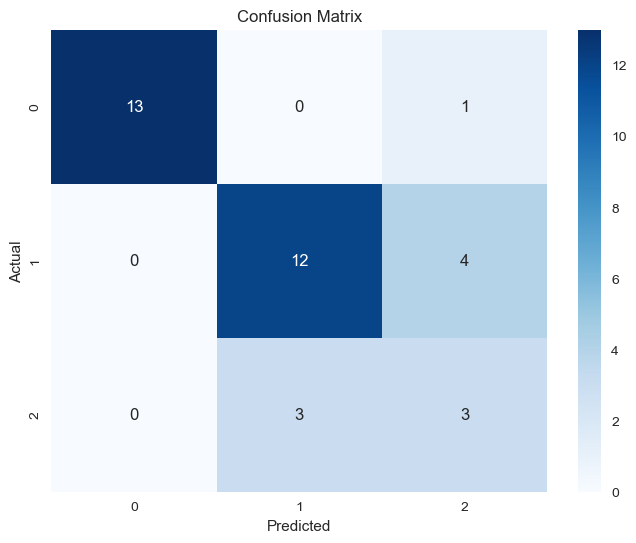

In [77]:
# TO DO: Print confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [78]:
# TO DO: Print classification report
# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.80      0.75      0.77        16
           3       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The Decision tree have significanly higher training and validation accuracy than the SVC with kernel = radial basis function.
2. SVC work well with linear data and may struggle with non linear structure. Another reason may be because of the choice of the kernel
3. 8
4. It depends on the consequences of the different errors. It depends on the problem's goal and constraints

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
a. imported the required library and dataset
b. Instantiated the model required for the task
c. Split the data into training and test sets
d. Created a list of the model to be used
e. Created a dictionary to hold the result
f. fit the model
g. Made predictions on the data
h  Performed cross validation
i  compared the validation and training accuracies
j. Used the heat map and confusion matrix to further view the data

4. Yes, I had challenges on the decision on the type of kernel to use and why. A lot needed to be read about the kernel but it was a lot to understand.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

The outcome totally depends on the type of data, the number of features and the complexity of the problem being solved. It has a tendency to be biased since the user may tend to want to increase the outcome to fit into a particular problem. A lot depends and relies on the data being used to train the model. Also, understanding how different parameters affect the outcome of the training goeas a long way to remove biases and improve outcomes.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I do not like the mathematical part of understanding how to use the parameters. It is very abstract and confusing

I find it interesting that outcomes can be predicted with mathematical models. Most problems can be solved with mathematics. I wish I had studied mathematics more.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [79]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*

In [80]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Instantiate the two models with max_depth = 3.

Vector_SVC = SVC(kernel='linear')
DTreeClass = DecisionTreeClassifier(max_depth = 5, random_state = 0)

#Implement each machine learning model with X and y
#split the X and y into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create a list of the models
models = [Vector_SVC, DTreeClass]

#Create a dictionary to store the result
results = {}

#As instructed, set scoring to 'neg_mean_squared_error'
#scorings = "neg_mean_squared_error"

for model in models:
    #fit the model to the training data
    model.fit(X_train, y_train)
    
    #Make predicitons on the test data
    y_prediction = model.predict(X_test)
    
    #Perform cross validation for each model on the training data
    cResult = cross_validate(model, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
    #print(cResult.keys())
    
    #perform the training and validation accuracy
    ctraining_accuracy = cResult["train_score"].mean()
    cValidation_accuracy = cResult["test_score"].mean()
    
    # Get the data size
    data_size = len(X_train)
   
    #Store the results in the dictionary
    results[type(model).__name__] = {'Data Size' : data_size,
        'Average Training accuracy': ctraining_accuracy,
         'Average Validation accuracy': cValidation_accuracy
    }
#Print the results
for model_name, mse in results.items():
    print(f"{model_name} - Data Size: {mse['Data Size']}, Average Training accuracy: {mse['Average Training accuracy']:.2f}, Average Validation accuracy: {mse['Average Validation accuracy']:.2f}")

SVC - Data Size: 142, Average Training accuracy: 1.00, Average Validation accuracy: 0.94
DecisionTreeClassifier - Data Size: 142, Average Training accuracy: 1.00, Average Validation accuracy: 0.93


In [83]:

# TO DO: Implement best model
best_model_name = max(results, key=lambda model: results[model]['Average Validation accuracy'])
best_model = models[0] if best_model_name == Vector_SVC.__class__.__name__ else models[1]

print(f"The best model is: {best_model_name}")

The best model is: SVC


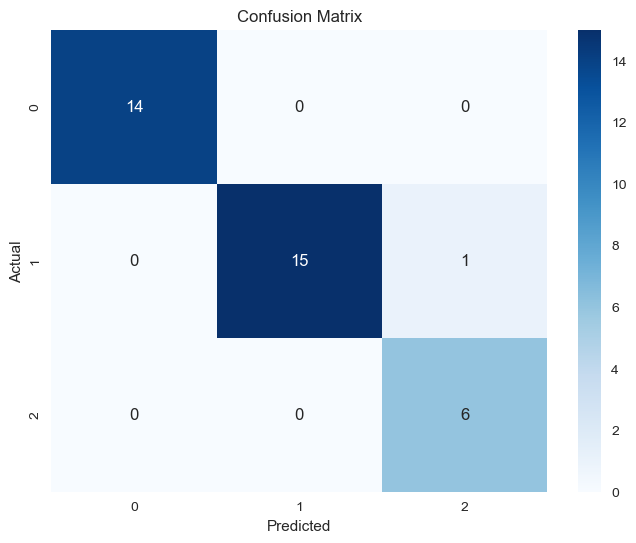

In [84]:
# TO DO: Print confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [85]:
# TO DO: Print classification report
# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

